# 정리

* train_guild와 test_guild를 merge해서 분석하는 것이 좋을듯... 어짜피 네트워크에서 tr과 te만 구분하면 문제 없음. 대신 네트워크 사이즈가 커져서 좀 더 real 길드네트워크에 가까운 네트워크를 확보할 수 있음.

* 

# Import module, data, function

In [1]:
#### import modules
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import re

# import itertools 
from itertools import chain
from itertools import groupby

In [2]:
# load data set
train_guild = pd.read_csv('../new_input/train_guild_lite.csv')
test_guild = pd.read_csv('../new_input/test_guild_lite.csv')
train_label = pd.read_csv('../new_input/train_label_lite.csv')

# 전체 길드 집합 만들기 
total_guild = pd.concat((train_guild,test_guild),axis=0,ignore_index=True)
total_guild.drop_duplicates(inplace=True)
total_guild.index = range(len(total_guild))

# label map
label_map = {'retained':0,'week':1,'month':2,'2month':3}

---

# Basic EDA

### 문파를 하는 사람은 얼마나 될까?

* Train_set : 전체의 16.736% 가 길드함.
* Test_set : 전체의 16.67% 가 길드함. 

### Target Distribution by 문파 가입 유무

# 문파 네트워크 분석

### 가입한 길드의 특징

* 어떤 유저가 가입한 길드의 크기
* (길드 크기 별 길드의 종류??) categorical $\Longrightarrow$ 이거 추가하면 의미 있나?
---
어떤 길드가 좋은 길드 나쁜 길드라고 말하기는 어렵지만... 길드 side bipartite projection을 통해...
* LCC
* eccentricity
* centralities

# Feature Engineering and EDA

### 0) 문파의 크기

In [114]:
train_guild.guild_member_acc_id.apply(lambda x: len(x.split(',')))

0        1
1        1
2        3
3        1
4       19
5        3
6        5
7        4
8        3
9        3
10       1
11       1
12      15
13       5
14       2
15      16
16       2
17       4
18      25
19       2
20       2
21       8
22       1
23      26
24       6
25      28
26       3
27      10
28      11
29       1
        ..
9933    10
9934    21
9935     3
9936     1
9937     1
9938     1
9939    19
9940    15
9941    30
9942    13
9943     1
9944     1
9945     1
9946     1
9947     2
9948     8
9949     9
9950     1
9951     2
9952     1
9953     3
9954     2
9955     3
9956    16
9957     4
9958     1
9959    14
9960     1
9961     1
9962    15
Name: guild_member_acc_id, Length: 9963, dtype: int64

### 1) 각 user가 가입한 문파의 수

In [119]:
total_guild.shape

(12166, 2)

In [122]:
train_label.index

RangeIndex(start=0, stop=100000, step=1)

In [3]:
X_train_guild = train_label.iloc[:,:1]

In [4]:
# training set 중 길드에 가입한 애들
tr_gm_id = set(','.join(train_guild.guild_member_acc_id.apply(lambda x: ','.join([g for g in x.split(',') if re.match('tr',g) != None]))).split(','))

In [5]:
# 유저 ~ 길드 딕셔너리(training set)
tr_guild_dict = {}
for k in tr_gm_id:
    indexer = train_guild.guild_member_acc_id.apply(lambda x: k in x.split(','))
    tr_guild_dict.update({k:','.join(train_guild.loc[indexer,:].guild_id)})
    

In [120]:
tr_guild_dict

{'tr42872': 'g6646,g6313,g3255',
 'tr95564': 'g9211,g11438',
 'tr66266': 'g1020',
 'tr39989': 'g10785',
 'tr18696': 'g11037,g12061,g7970',
 'tr86699': 'g1034,g9982,g573',
 'tr94846': 'g10539',
 'tr75982': 'g6087,g11953,g11307',
 'tr49849': 'g9044',
 'tr93364': 'g12041',
 'tr69330': 'g8704,g10833,g2419,g1686',
 'tr45114': 'g5523',
 'tr57690': 'g9675,g6522',
 'tr89477': 'g1840',
 'tr41673': 'g2297',
 'tr60227': 'g11093',
 'tr55135': 'g10173,g8172,g6506',
 'tr4060': 'g3255,g7632',
 'tr65507': 'g266,g6419',
 'tr26107': 'g11153,g12017',
 'tr64021': 'g614',
 'tr24489': 'g354',
 'tr8190': 'g6725',
 'tr2647': 'g10115',
 'tr60668': 'g3361,g7089',
 'tr18066': 'g9611,g1301',
 'tr15624': 'g9214',
 'tr13770': 'g4877,g2159',
 'tr26852': 'g11255',
 'tr61990': 'g3750,g1748,g3928',
 'tr99111': 'g262',
 'tr26067': 'g221,g1808,g10015',
 'tr12226': 'g5659,g7855,g9448',
 'tr55986': 'g575',
 'tr49168': 'g9440',
 'tr73375': 'g3671,g3426',
 'tr4883': 'g9046',
 'tr221': 'g5913',
 'tr96377': 'g5904',
 'tr92831'

In [121]:
{k : len(tr_guild_dict[k].split(',')) for k in tr_guild_dict.keys()}

{'tr42872': 3,
 'tr95564': 2,
 'tr66266': 1,
 'tr39989': 1,
 'tr18696': 3,
 'tr86699': 3,
 'tr94846': 1,
 'tr75982': 3,
 'tr49849': 1,
 'tr93364': 1,
 'tr69330': 4,
 'tr45114': 1,
 'tr57690': 2,
 'tr89477': 1,
 'tr41673': 1,
 'tr60227': 1,
 'tr55135': 3,
 'tr4060': 2,
 'tr65507': 2,
 'tr26107': 2,
 'tr64021': 1,
 'tr24489': 1,
 'tr8190': 1,
 'tr2647': 1,
 'tr60668': 2,
 'tr18066': 2,
 'tr15624': 1,
 'tr13770': 2,
 'tr26852': 1,
 'tr61990': 3,
 'tr99111': 1,
 'tr26067': 3,
 'tr12226': 3,
 'tr55986': 1,
 'tr49168': 1,
 'tr73375': 2,
 'tr4883': 1,
 'tr221': 1,
 'tr96377': 1,
 'tr92831': 4,
 'tr224': 3,
 'tr17468': 1,
 'tr36252': 1,
 'tr87593': 2,
 'tr70166': 1,
 'tr19262': 2,
 'tr31642': 2,
 'tr88421': 2,
 'tr3275': 4,
 'tr20155': 1,
 'tr53964': 1,
 'tr81856': 1,
 'tr2111': 1,
 'tr14164': 4,
 'tr62319': 1,
 'tr1356': 2,
 'tr91975': 1,
 'tr79027': 1,
 'tr43063': 2,
 'tr17424': 1,
 'tr90942': 4,
 'tr12681': 1,
 'tr71081': 1,
 'tr79346': 1,
 'tr7319': 5,
 'tr59032': 2,
 'tr22096': 1,
 'tr519

In [116]:
a = {1,2}

In [117]:
b = {3,4}

In [118]:
a.union(b)

{1, 2, 3, 4}

In [6]:
tr_guild_dict

{'tr42872': 'g6646,g6313,g3255',
 'tr95564': 'g9211,g11438',
 'tr66266': 'g1020',
 'tr39989': 'g10785',
 'tr18696': 'g11037,g12061,g7970',
 'tr86699': 'g1034,g9982,g573',
 'tr94846': 'g10539',
 'tr75982': 'g6087,g11953,g11307',
 'tr49849': 'g9044',
 'tr93364': 'g12041',
 'tr69330': 'g8704,g10833,g2419,g1686',
 'tr45114': 'g5523',
 'tr57690': 'g9675,g6522',
 'tr89477': 'g1840',
 'tr41673': 'g2297',
 'tr60227': 'g11093',
 'tr55135': 'g10173,g8172,g6506',
 'tr4060': 'g3255,g7632',
 'tr65507': 'g266,g6419',
 'tr26107': 'g11153,g12017',
 'tr64021': 'g614',
 'tr24489': 'g354',
 'tr8190': 'g6725',
 'tr2647': 'g10115',
 'tr60668': 'g3361,g7089',
 'tr18066': 'g9611,g1301',
 'tr15624': 'g9214',
 'tr13770': 'g4877,g2159',
 'tr26852': 'g11255',
 'tr61990': 'g3750,g1748,g3928',
 'tr99111': 'g262',
 'tr26067': 'g221,g1808,g10015',
 'tr12226': 'g5659,g7855,g9448',
 'tr55986': 'g575',
 'tr49168': 'g9440',
 'tr73375': 'g3671,g3426',
 'tr4883': 'g9046',
 'tr221': 'g5913',
 'tr96377': 'g5904',
 'tr92831'

In [124]:
total_guild

,guild_id,guild_member_acc_id
0,g10073,tr44150
1,g3834,tr15675
2,g3536,"ot3099,ot61702,tr52126"
3,g139,tr30430
4,g2380,"te11997,tr86424,te6746,tr49586,tr17614,ot20349..."
5,g2667,"te36898,tr74950,tr94057"
6,g3760,"tr690,tr85053,te16637,ot16638,ot170944"
7,g143,"ot184711,tr96553,tr38920,tr52061"
8,g3216,"te37385,ot50101,tr40805"
9,g9675,"ot60314,tr57690,tr38708"


In [127]:
g_size = total_guild.guild_member_acc_id.apply(lambda x: len(x.split(',')))
total_guild_size = {g: g_size[i] for i,g in enumerate(total_guild.guild_id)}

In [128]:
total_guild_size

{'g10073': 1,
 'g3834': 1,
 'g3536': 3,
 'g139': 1,
 'g2380': 19,
 'g2667': 3,
 'g3760': 5,
 'g143': 4,
 'g3216': 3,
 'g9675': 3,
 'g12010': 1,
 'g2934': 1,
 'g10451': 15,
 'g11339': 5,
 'g4010': 2,
 'g82': 16,
 'g5725': 2,
 'g3945': 4,
 'g3192': 25,
 'g1756': 2,
 'g2808': 2,
 'g4642': 8,
 'g4807': 1,
 'g449': 26,
 'g8094': 6,
 'g2540': 28,
 'g7657': 3,
 'g337': 10,
 'g5340': 11,
 'g8124': 1,
 'g12020': 6,
 'g10723': 1,
 'g4178': 1,
 'g11483': 1,
 'g591': 1,
 'g11914': 1,
 'g1806': 8,
 'g83': 1,
 'g7995': 9,
 'g11041': 1,
 'g7683': 1,
 'g7536': 1,
 'g12106': 2,
 'g9027': 4,
 'g9019': 2,
 'g4390': 2,
 'g2866': 16,
 'g3808': 2,
 'g10364': 3,
 'g212': 1,
 'g9754': 13,
 'g1882': 2,
 'g5156': 13,
 'g9586': 7,
 'g7334': 10,
 'g3949': 15,
 'g8278': 1,
 'g9343': 1,
 'g11738': 1,
 'g8198': 1,
 'g8674': 3,
 'g6098': 4,
 'g3660': 23,
 'g10411': 1,
 'g685': 3,
 'g10082': 1,
 'g8061': 34,
 'g3780': 1,
 'g995': 1,
 'g7112': 1,
 'g9327': 2,
 'g2645': 1,
 'g11957': 1,
 'g11347': 1,
 'g4306': 1,
 'g682

In [7]:
# 길드에 가입한 애 중 길드에 가입한 수
tr_num_guild = {}
for k in tr_gm_id:
    indexer = train_guild.guild_member_acc_id.apply(lambda x: k in x.split(','))
    tr_num_guild.update({k:sum(indexer)})

In [8]:
# train_label을 기준으로....
num_guild = X_train_guild.new_id.apply(lambda x: 0 if tr_num_guild.get(x) == None else tr_num_guild[x])

In [9]:
# X_train에 붙이기
X_train_guild = pd.concat((X_train_guild,num_guild),axis=1)
X_train_guild.columns = ['new_id','num_guild']

In [10]:
X_train_guild.num_guild.describe()

count    100000.000000
mean          0.272380
std           0.740564
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: num_guild, dtype: float64

### [EDA] num_guild의 분포

In [11]:
num = 2
dist = X_train_guild.num_guild.apply(lambda x: x >= num)
print('가입 길드의 수가 {}개 이상인 유저의 비율 {}'.format(num, dist.sum()/len(X_train_guild)))

가입 길드의 수가 2개 이상인 유저의 비율 0.06525


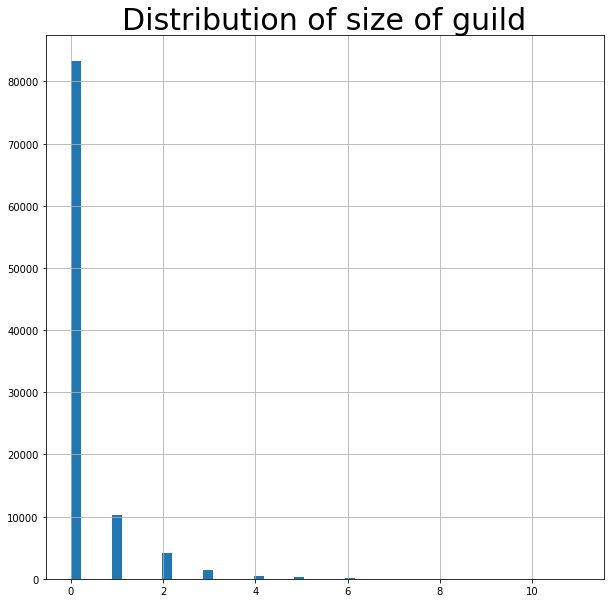

In [12]:
plt.figure(figsize=[10,10]);
plt.title('Distribution of size of guild',size=30)
X_train_guild.num_guild.hist(bins=50)

### [EDA] target 분포

In [13]:
### ㄱㄱ

### 2) 각 user가 가입한 문파의 크기합

__sum_guild = num_guild x 문파의 크기__

### 2-1) 문파 종류.. categorical

### 문파 네트워크

* 문파 네트워크는 `문파원 - 문파`간의 이분 그래프를 `문파` space로 projection해서 정의함.
* 네트워크 분석은 전체적인 관점에서 분석하는 것이 중요하므로... `total_guild`로 분석.

__문파관련 Metric의 피쳐 규칙__

* 문파 없는 유저: 0으로 padding
* 문파 1개인 유저: metric
* 문파 2개인 유저: metric들의 가중합. (유저가 어떤 특징을 갖는 문파를 여러개 들었으면 그런 성향이 강조된다고 가정) 

문파 네트워크가 bipartite graph인지 확인

In [14]:
# make nested list form
total_guild_edgelist = [[(g,m) for m in total_guild.guild_member_acc_id[i].split(',')] for i,g in enumerate(total_guild.guild_id)]

# unnest to nested list 
total_guild_edgelist = list(chain(*total_guild_edgelist))

In [15]:
#### bipartite instance 생성
B_mem_to_guild = nx.Graph()

# bipartition set
bp0 = pd.DataFrame(total_guild_edgelist,columns=['guild','guild_mem']).guild_mem
bp1 = pd.DataFrame(total_guild_edgelist,columns=['guild','guild_mem']).guild

# bipartite Graph
B_mem_to_guild.add_nodes_from(bp0,bipartite = 0)
B_mem_to_guild.add_nodes_from(bp1,bipartite = 1)
B_mem_to_guild.add_edges_from(total_guild_edgelist)

bipartite.is_bipartite(B_mem_to_guild)

True

In [16]:
#### bipartite projection!!! to guild space
G_guild = bipartite.weighted_projected_graph(B_mem_to_guild,bp1)

### 3) 문파 네트워크 - LCC

In [17]:
# LCC
lcc = nx.clustering(G_guild)

In [18]:
net_lcc = X_train_guild.new_id.apply(lambda x: 0 if tr_guild_dict.get(x) == None else sum([lcc[g] for g in tr_guild_dict[x].split(',')]))

In [19]:
# X_train에 붙이기
X_train_guild = pd.concat((X_train_guild,net_lcc),axis=1)
X_train_guild.columns = ['new_id','num_guild','net_lcc']

### 4) 문파 네트워크 - Centrality

degree centrality

In [77]:
# degree centrality 구하기
cen = nx.degree_centrality(G_guild)

In [80]:
# 디그리 중심성
net_DegCen = X_train_guild.new_id.apply(lambda x:0 if tr_guild_dict.get(x) == None else sum([cen[g] for g in tr_guild_dict[x].split(',')]))

closeness centrality

In [84]:
# cloaseness centrality 구하기 
cen = nx.closeness_centrality(G_guild)

In [85]:
# 인접 중심성
net_ClsCen = X_train_guild.new_id.apply(lambda x:0 if tr_guild_dict.get(x) == None else sum([cen[g] for g in tr_guild_dict[x].split(',')]))

Betweeness centrality

In [88]:
# Betweeness centrality 구하기
cen = nx.betweenness_centrality(G_guild)

In [89]:
# 연결중심성
net_BetCen = X_train_guild.new_id.apply(lambda x:0 if tr_guild_dict.get(x) == None else sum([cen[g] for g in tr_guild_dict[x].split(',')]))

Eigenvector centrality

In [90]:
# Eigenvector centrality 구하기
cen = nx.eigenvector_centrality(G_guild)

In [91]:
# 아이겐벡터 중심성
net_EigCen = X_train_guild.new_id.apply(lambda x:0 if tr_guild_dict.get(x) == None else sum([cen[g] for g in tr_guild_dict[x].split(',')]))

붙여버려~

In [94]:
# X_train에 붙이기
X_train_guild = pd.concat((X_train_guild,net_DegCen,net_ClsCen,net_BetCen,net_EigCen),axis=1)
X_train_guild.columns = ['new_id','num_guild','net_lcc','net_DegCen','net_ClsCen','net_BetCen','net_EigCen']

---

sub_graph centrality

??? 뭐하는 애일까??
- 그냥 우선 log 취해서 넣자

In [136]:
nx.subgraph_centrality(G_guild)

{'g10073': 1.0,
 'g3834': 1.0,
 'g3536': 846.0980093027473,
 'g139': 123.23132056748382,
 'g2380': 2334.4211580344627,
 'g2667': 277878.9067806284,
 'g3760': 106693.25532652794,
 'g143': 180842.3914536776,
 'g3216': 24.568771161338063,
 'g9675': 8.16785148938654,
 'g12010': 1.0000000000000002,
 'g2934': 5.166423970893113,
 'g10451': 9648.73654864142,
 'g11339': 152394.52165792094,
 'g4010': 11.213933559565989,
 'g82': 319144277.7592472,
 'g5725': 1.0,
 'g3945': 11.167094769863697,
 'g3192': 12468633.270203806,
 'g1756': 69.74737220643685,
 'g2808': 0.9999999999999999,
 'g4642': 574750.172161275,
 'g4807': 60874.17934166868,
 'g449': 286032.75414754765,
 'g8094': 538.4480535660316,
 'g2540': 83271569.57556088,
 'g7657': 37660.550687482806,
 'g337': 7582983.569149603,
 'g5340': 4190126.2107565757,
 'g8124': 21.883893849402476,
 'g12020': 203611.79991428513,
 'g10723': 5.180587588210676,
 'g4178': 0.9999999999999994,
 'g11483': 6981.915914640404,
 'g591': 41.246349793202896,
 'g11914': 66

---

### 유저들 간의 특징??

* 길드를 통한 유저들 간의 유사성 연구
---
user-side bipartite projection을 통해...
* LCC
* eccentricity
* centralities

### 길드 내 유저의 특징 - 파티와 거래를 weight로 모델링

Multi weighted digraph

* time - series적인 특성...

### 파티

### 거래